<a href="https://colab.research.google.com/github/CleonKalea/Foundation-of-Data-Science/blob/master/Tugas%201/Exploratory%20Data%20Analysis%20-%202021%20Salary%20Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis using Salary Survey 2021 Data**

# Install and Import Required Library

In [113]:
!pip install forex_python

In [2]:
import pandas as pd
import numpy as np
from forex_python.converter import CurrencyRates
import matplotlib.pyplot as plt

# Prepare the Data

In [115]:
# URL to 2021 Salary Survey Data (Excel)
data_url = 'https://github.com/CleonKalea/Foundation-of-Data-Science/raw/master/Tugas%201/salary_survey_2021.xlsx'

# Read the File and Make it into DataFrame
original_df = pd.read_excel(data_url)

original_df

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,2023-02-27 06:22:35.240,25-34,Computing or Tech,Sr software engineer,NaN,190000,14000.0,USD,NaN,NaN,United States,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American
27942,2023-03-01 09:43:37.098,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,NaN,NaN,United States,Ohio,Brunswick,21 - 30 years,11 - 20 years,NaN,NaN,NaN
27943,2023-03-06 18:16:18.899,25-34,Behavioral Health,Mental Health Therapist,NaN,52416,NaN,USD,NaN,NaN,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White
27944,2023-03-09 09:11:48.506,18-24,Computing or Tech,Help Desk Associate Analyst,NaN,36000,NaN,USD,NaN,NaN,United States,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American


CREATE NEW DATAFRAME

In [79]:
data = {'Industry' : None,
        'Work Experience Overall' : None,
        'Work Experience in the same Field' :  None,
        'Gender' : None,
        'Education' : None,
        'Total Salary' : None,
        'Currency' : None,
        'Total Salary (USD)' : None}

latihan_df = pd.DataFrame(data, columns=['Industry', 'Work Experience Overall', 'Work Experience in the same Field', 'Gender', 'Education', 'Currency', 'Total Salary', 'Total Salary (USD)'])
latihan_df

# latihan_df.loc[0, 'Industry'] = "testing"
# latihan_df

# latihan_df.drop(0, inplace=True)
# latihan_df

,Industry,Work Experience Overall,Work Experience in the same Field,Gender,Education,Currency,Total Salary,Total Salary (USD)


RENAME ORIGINAL DATAFRAME COLUMN

In [80]:
df = df.rename(columns={"What is your annual salary? (You\'ll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'Annual Salary',
                        "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits." : "Monetary Compensation",
                        "What industry do you work in?" : "Industry",
                        "How many years of professional work experience do you have overall?" : "Work Experience Overall",
                        "How many years of professional work experience do you have in your field?" : "Work Experience in the same Field",
                        "What is your gender?" : "Gender",
                        "What is your highest level of education completed?" : "Education",
                        "Please indicate the currency" : "Currency",
                        "If \"Other,\" please indicate the currency here: " : "Other Currency"})

df.iloc[0]

Timestamp                                                                   2021-04-27 11:02:09.743000
How old are you?                                                                                 25-34
Industry                                                                  Education (Higher Education)
Job title                                                           Research and Instruction Librarian
If your job title needs additional context, please clarify here:                                   NaN
Annual Salary                                                                                    55000
Monetary Compensation                                                                              0.0
Currency                                                                                           USD
Other Currency                                                                                     NaN
If your income needs additional context, please provide it here:         

In [81]:
# df.columns
# group_result = df['Industry'].value_counts().reset_index()
# group_result = df['Work Experience Overall'].value_counts().reset_index()
# group_result = df['Work Experience in the same Field'].value_counts().reset_index()
# group_result = df['Gender'].value_counts().reset_index()
# group_result = df['Education'].value_counts().reset_index()
group_result = df['Currency'].value_counts().reset_index()
# group_result = df['Other Currency'].value_counts().reset_index()
print(group_result.to_string())

      index  Currency
0       USD     23288
1       CAD      1665
2       GBP      1585
3       EUR       637
4   AUD/NZD       500
5     Other       156
6       CHF        37
7       SEK        37
8       JPY        23
9       ZAR        14
10      HKD         4


In [ ]:
latihan_df = df[['Industry', 'Work Experience Overall', 'Work Experience in the same Field',
                         'Annual Salary', 'Monetary Compensation', 'Currency']]

# Merge with the DataFrame containing currency conversion rates
df_merged = pd.merge(df_merged, df_rates, on='Currency', how='left')

# Calculate total salary in USD using vectorized operations
df_merged['Total Salary (USD)'] = df_merged['Annual Salary'] + df_merged['Monetary Compensation']
df_merged['Total Salary (USD)'] *= df_merged['Conversion_Rate_to_USD']

# Drop unnecessary columns
df_merged.drop(['Currency', 'Conversion_Rate_to_USD'], axis=1, inplace=True)

In [82]:
total_rows = df.shape[0]
c = CurrencyRates()
GBP_to_USD = c.get_rate('GBP', 'USD')

for i in range(total_rows):
    industry = df.loc[i, 'Industry']
    work_experience_overall = df.loc[i, 'Work Experience Overall']
    work_experience_in_the_same_field = df.loc[i, 'Work Experience in the same Field']
    annual_salary = df.loc[i, 'Annual Salary']
    monetary_compensation = df.loc[i, 'Monetary Compensation']
    currency = df.loc[i, 'Currency']
    gender = df.loc[i, 'Gender']
    education = df.loc[i, 'Education']

    if np.isnan(monetary_compensation):
        monetary_compensation = 0.0
    else:
        monetary_compensation = monetary_compensation

    total_salary = annual_salary + monetary_compensation

    latihan_df.loc[i, 'Industry'] = industry
    latihan_df.loc[i, 'Work Experience Overall'] = work_experience_overall
    latihan_df.loc[i, 'Work Experience in the same Field'] = work_experience_in_the_same_field
    latihan_df.loc[i, 'Total Salary'] = total_salary
    latihan_df.loc[i, 'Currency'] = currency
    latihan_df.loc[i, 'Gender'] = gender
    latihan_df.loc[i, 'Education'] = education

    print(currency, i)

# 'Industry', 'Work Experience Overall', 'Work Experience in the same Field', 'Total Salary', 'Currency', 'Gender', 'Education'
# df['Total Salary'] = pd.Series([np.nan] * len(df))
latihan_df

Streaming output truncated to the last 5000 lines.
USD 22946
USD 22947
USD 22948
USD 22949
USD 22950
USD 22951
USD 22952
GBP 22953
GBP 22954
GBP 22955
USD 22956
USD 22957
USD 22958
USD 22959
USD 22960
USD 22961
USD 22962
USD 22963
USD 22964
USD 22965
EUR 22966
USD 22967
GBP 22968
USD 22969
USD 22970
USD 22971
USD 22972
USD 22973
USD 22974
USD 22975
USD 22976
EUR 22977
USD 22978
CAD 22979
USD 22980
USD 22981
USD 22982
USD 22983
USD 22984
CAD 22985
USD 22986
USD 22987
USD 22988
GBP 22989
USD 22990
USD 22991
USD 22992
USD 22993
USD 22994
USD 22995
USD 22996
USD 22997
USD 22998
USD 22999
EUR 23000
USD 23001
USD 23002
USD 23003
USD 23004
USD 23005
USD 23006
GBP 23007
USD 23008
USD 23009
USD 23010
Other 23011
USD 23012
USD 23013
USD 23014
USD 23015
USD 23016
USD 23017
USD 23018
USD 23019
USD 23020
GBP 23021
USD 23022
USD 23023
USD 23024
USD 23025
CAD 23026
USD 23027
USD 23028
EUR 23029
USD 23030
USD 23031
CAD 23032
USD 23033
USD 23034
USD 23035
USD 23036
USD 23037
GBP 23038
GBP 23039
USD 230

,Industry,Work Experience Overall,Work Experience in the same Field,Gender,Education,Currency,Total Salary,Total Salary (USD)
0,Education (Higher Education),5-7 years,5-7 years,Woman,Master's degree,USD,55000.0,NaN
1,Computing or Tech,8 - 10 years,5-7 years,Non-binary,College degree,GBP,58600.0,NaN
2,"Accounting, Banking & Finance",2 - 4 years,2 - 4 years,Woman,College degree,USD,34000.0,NaN
3,Nonprofits,8 - 10 years,5-7 years,Woman,College degree,USD,65000.0,NaN
4,"Accounting, Banking & Finance",8 - 10 years,5-7 years,Woman,College degree,USD,67000.0,NaN
...,...,...,...,...,...,...,...,...
27941,Computing or Tech,5-7 years,5-7 years,Man,College degree,USD,204000.0,NaN
27942,Property or Construction,21 - 30 years,11 - 20 years,NaN,NaN,USD,68000.0,NaN
27943,Behavioral Health,2 - 4 years,2 - 4 years,Woman,Master's degree,USD,52416.0,NaN
27944,Computing or Tech,5-7 years,2 - 4 years,Man,College degree,USD,36000.0,NaN


In [83]:
latihan_df['Currency'] = latihan_df['Currency'].replace("AUD/NZD", "AUD")

In [84]:
# Initialize CurrencyRates object
c = CurrencyRates()

# Get all supported currencies with exchange rates relative to USD
all_currencies = c.get_rates('USD')

# Include USD in the dictionary with a value of 1
all_currencies['USD'] = 1.0

# Store the currencies and their exchange rates in a dictionary
exchange_rates = all_currencies

# Print the dictionary
for key, value in exchange_rates.items():
    print(key, value)

EUR 0.9286775631500743
JPY 150.33432392273403
BGN 1.8163075780089153
CZK 23.64413075780089
DKK 6.922919762258544
GBP 0.794994427934621
HUF 361.3763001485884
PLN 4.030460624071322
RON 4.622121099554235
SEK 10.462017087667162
CHF 0.8814078751857356
ISK 138.46582466567608
NOK 10.545598068350667
TRY 30.827544576523028
AUD 1.5338967310549776
BRL 4.973161218424963
CAD 1.348254086181278
CNY 7.193629271916791
HKD 7.8228083209509665
IDR 15636.497028231799
INR 83.00659361069837
KRW 1332.73588410104
MXN 17.044576523031203
MYR 4.780460624071322
NZD 1.638930163447251
PHP 55.96025260029718
SGD 1.3465824665676076
THB 36.059621099554235
ZAR 18.886979940564636
USD 1.0


In [ ]:
for i in range(total_rows):
  currency = latihan_df.loc[i, 'Currency']
  # print(currency, i)

  if currency in exchange_rates:
      converted_total_salary_to_USD = latihan_df.loc[i, "Total Salary"] / exchange_rates[currency]
      latihan_df.loc[i, 'Total Salary (USD)'] = converted_total_salary_to_USD
      print(f'{latihan_df.loc[i, "Total Salary"]} {currency} --> {converted_total_salary_to_USD} USD')
  else:
      latihan_df.loc[i, 'Total Salary (USD)'] = np.nan
      print(f" {i} --> Conversion rate for {currency} to USD is not available. Skipping conversion.")


In [88]:
latihan_df['Total Salary (USD)']

0             55000.0
1        73711.208457
2             34000.0
3             65000.0
4             67000.0
             ...     
27941        204000.0
27942         68000.0
27943         52416.0
27944         36000.0
27945         60000.0
Name: Total Salary (USD), Length: 27946, dtype: object

In [91]:
# Boolean indexing to find rows where the value matches
latihan_df = latihan_df.drop(latihan_df[latihan_df['Total Salary'] == 102000000].index)

In [92]:
# Convert 'Total Salary (USD)' column to numeric values
latihan_df['Total Salary (USD)'] = pd.to_numeric(latihan_df['Total Salary (USD)'], errors='coerce')


In [93]:
latihan_df['Total Salary (USD)'] = latihan_df['Total Salary (USD)'].round(1)

In [94]:
# Find the index of the maximum value in the "Total Salary" column
max_index = latihan_df['Total Salary (USD)'].idxmax()

# Get the corresponding value in the "Industry" column using the index
max_industry = latihan_df.loc[max_index, 'Industry']

max_salary = latihan_df.loc[max_index, 'Total Salary (USD)']

print(max_index)
print("Industry with maximum Total Salary:", max_industry)
max_salary

26466
Industry with maximum Total Salary: Sales


5004044.0

In [72]:
print(latihan_df['Total Salary (USD)'])

0         55000.0
1         46586.7
2         34000.0
3         65000.0
4         67000.0
           ...   
27941    204000.0
27942     68000.0
27943     52416.0
27944     36000.0
27945     60000.0
Name: Total Salary (USD), Length: 27945, dtype: float64


In [96]:
# Boolean indexing to find rows where the value matches
result = latihan_df.iloc[max_index-1]

# Print the result
print(result)

Industry                                       Sales
Work Experience Overall                31 - 40 years
Work Experience in the same Field      21 - 30 years
Gender                                         Woman
Education                            Master's degree
Currency                                         USD
Total Salary                               5004044.0
Total Salary (USD)                         5004044.0
Name: 26466, dtype: object


In [97]:
max_salary_by_industry = latihan_df.groupby('Industry')['Total Salary (USD)'].max().reset_index()
min_salary_by_industry = latihan_df.groupby('Industry')['Total Salary (USD)'].min().reset_index()

print(max_salary_by_industry)
print(min_salary_by_industry)

                                Industry  Total Salary (USD)
0                                  Buyer             78950.0
1                    Veterinary medicine            155000.0
2     "Government Relations" (Lobbying)              65000.0
3                               Academia             66115.5
4                              Academia              28000.0
...                                  ...                 ...
1204        trade association/membership             67100.0
1205                         translation                 NaN
1206                  veterinary biotech             99000.0
1207                         video games             28602.9
1208              wholesale distribution            150006.0

[1209 rows x 2 columns]
                                Industry  Total Salary (USD)
0                                  Buyer             78950.0
1                    Veterinary medicine            155000.0
2     "Government Relations" (Lobbying)              65000.0

In [98]:
def extract_work_experience(exp_str):
    if '-' in exp_str:
        exp_values = exp_str.split('-')
        second_part = exp_values[1].split()[0]  # Remove any non-numeric characters
        return (int(exp_values[0]) + int(second_part)) / 2  # Taking average for range
    elif 'years' in exp_str:
        exp_values = exp_str.split(' ')
        return int(exp_values[0])
    else:
        return int(exp_str.split()[0])

In [99]:
latihan_df['Work Experience Numeric'] = latihan_df['Work Experience Overall'].apply(extract_work_experience)

In [100]:
work_salary_correlation = latihan_df['Work Experience Numeric'].corr(latihan_df['Total Salary (USD)'])

print("Korelasi Pengalaman Kerja dengan Gaji:", work_salary_correlation)

Korelasi Pengalaman Kerja dengan Gaji: 0.14224094256770892


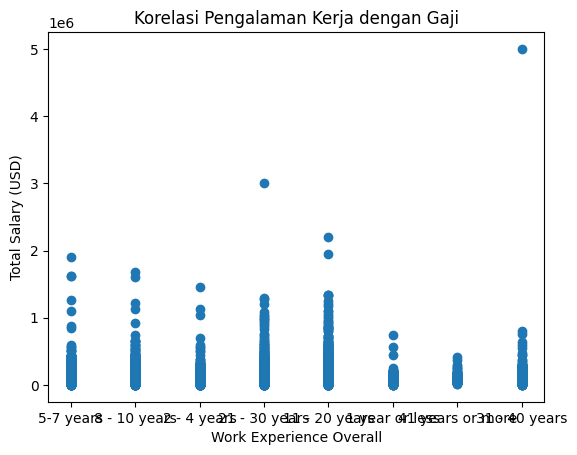

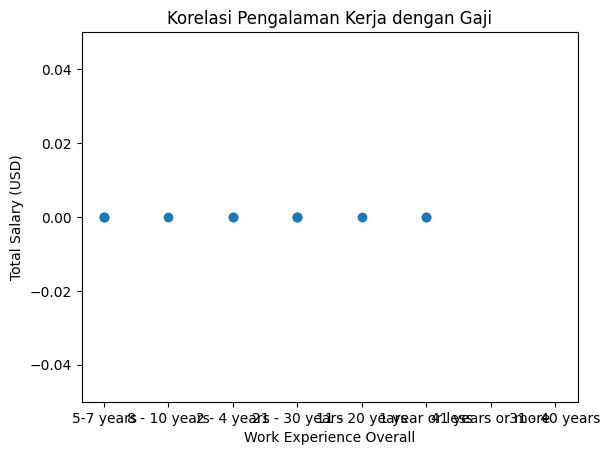

In [102]:
plt.scatter(latihan_df['Work Experience Overall'], latihan_df['Total Salary (USD)'])
plt.xlabel('Work Experience Overall')
plt.ylabel('Total Salary (USD)')
plt.title('Korelasi Pengalaman Kerja dengan Gaji')
plt.show()

plt.scatter(latihan_df['Work Experience Overall'], latihan_df['Total Salary (USD)'])
plt.xlabel('Work Experience Overall')
plt.ylabel('Total Salary (USD)')
plt.title('Korelasi Pengalaman Kerja dengan Gaji')
plt.ylim(bottom=-0.05, top=0.05)
plt.show()

In [106]:
# Check for missing values in the "Gender" column
missing_indices = df.index[df['Gender'].isna()].tolist()

# Print the indices of missing values in the "Gender" column
if missing_indices:
    print("Missing values in the 'Gender' column at indices:", missing_indices)

print(latihan_df.iloc[171])

Missing values in the 'Gender' column at indices: [171, 490, 537, 647, 658, 773, 1087, 1269, 1584, 1794, 1960, 2125, 2213, 2353, 2663, 3043, 3143, 3251, 3800, 4203, 4324, 4360, 4750, 5027, 5337, 5496, 5594, 5677, 5881, 6446, 6638, 6784, 6794, 7226, 7595, 7691, 7748, 8002, 8058, 8137, 8440, 8469, 8769, 9019, 9148, 9767, 9914, 9947, 10223, 10639, 10706, 10777, 11053, 11162, 11208, 11500, 11915, 12226, 12504, 12634, 12770, 13004, 13148, 13492, 13581, 13659, 13928, 14061, 14103, 14257, 14273, 14373, 14765, 14790, 15087, 15144, 15424, 15489, 15534, 15574, 15764, 16043, 16058, 16145, 16421, 16542, 16708, 17353, 17354, 17428, 17533, 17553, 17554, 17884, 17909, 17985, 18012, 18478, 18720, 18813, 18893, 18902, 18966, 19023, 19055, 19565, 19631, 19882, 20087, 20242, 20292, 20775, 21029, 21342, 21686, 21726, 21924, 21940, 22083, 22115, 22199, 22299, 22493, 22507, 22586, 22791, 22928, 23212, 23279, 23306, 23326, 23396, 23429, 23521, 23530, 23713, 23957, 24258, 24347, 24710, 24878, 24922, 25051, 25

In [104]:
latihan_df['Gender in Numeric'] = pd.factorize(latihan_df['Gender'])[0]

In [107]:
gender_salary_correlation = latihan_df['Gender in Numeric'].corr(latihan_df['Total Salary (USD)'], method='pearson')

print("Korelasi Jenis Kelamin dengan Gaji:", gender_salary_correlation)

Korelasi Jenis Kelamin dengan Gaji: 0.15200257454756957


In [ ]:
latihan_df['Gender'] = latihan_df['Gender'].astype(str)

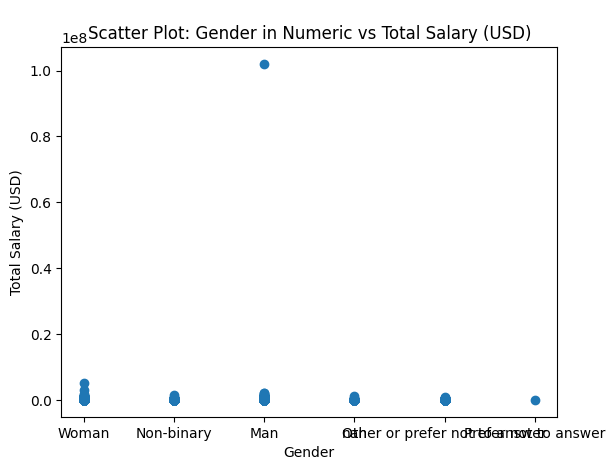

In [ ]:
plt.scatter(latihan_df['Gender'], latihan_df['Total Salary (USD)'])
plt.xlabel('Gender')
plt.ylabel('Total Salary (USD)')
plt.title('Scatter Plot: Gender in Numeric vs Total Salary (USD)')
plt.show()

In [108]:
# Check for missing values in the "Gender" column
missing_indices = df.index[df['Education'].isna()].tolist()

# Print the indices of missing values in the "Gender" column
if missing_indices:
    print("Missing values in the 'Education' column at indices:", missing_indices)

Missing values in the 'Education' column at indices: [13, 24, 192, 241, 659, 736, 894, 1056, 1087, 1136, 1159, 1268, 1286, 1544, 1714, 1794, 1822, 2125, 2471, 2476, 2486, 2586, 2620, 2759, 2983, 3339, 3463, 3831, 3968, 4133, 4198, 4659, 5077, 5418, 5590, 5648, 5866, 5879, 6023, 6037, 6397, 6446, 6638, 6765, 6875, 6878, 6886, 7226, 7259, 7266, 7627, 7989, 8046, 8058, 8207, 8299, 8440, 8469, 8530, 8636, 8719, 8769, 8788, 9329, 9740, 9767, 9987, 11670, 11673, 11683, 11700, 11914, 11970, 12050, 12152, 12590, 12631, 12682, 12777, 12799, 12863, 13263, 13576, 13581, 13778, 14061, 14103, 14166, 14273, 14287, 14358, 14427, 14428, 14554, 14574, 14604, 14626, 14709, 14779, 14833, 14838, 14926, 15087, 15144, 15263, 15304, 15309, 15395, 15414, 15535, 15696, 15774, 15784, 15974, 16132, 16218, 16281, 16502, 16514, 16668, 16693, 16766, 17032, 17059, 17066, 17071, 17292, 17345, 17354, 17374, 17426, 17533, 17554, 17909, 17960, 17991, 18661, 18720, 18814, 18902, 19176, 19408, 19412, 19463, 19565, 19781, 

In [109]:
latihan_df['Education in Numeric'] = pd.factorize(latihan_df['Education'])[0]

In [110]:
education_salary_correlation = latihan_df['Education in Numeric'].corr(latihan_df['Total Salary (USD)'], method='pearson')
print("Korelasi Tingkat Pendidikan dengan Gaji:", education_salary_correlation)

Korelasi Tingkat Pendidikan dengan Gaji: 0.06805822242282938


In [111]:
latihan_df['Education'] = latihan_df['Education'].astype(str)

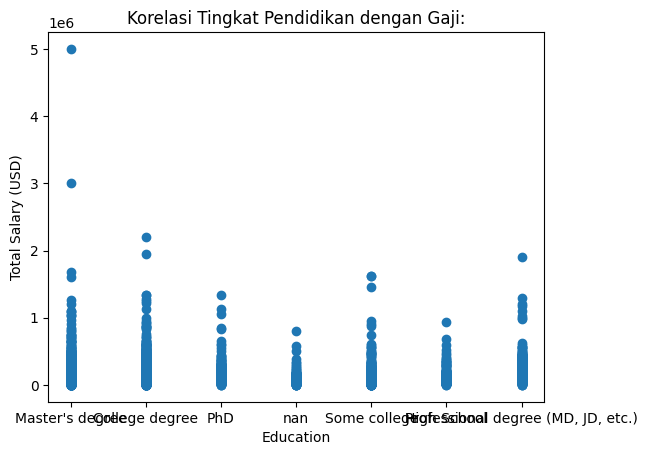

In [112]:
plt.scatter(latihan_df['Education'], latihan_df['Total Salary (USD)'])
plt.xlabel('Education')
plt.ylabel('Total Salary (USD)')
plt.title('Korelasi Tingkat Pendidikan dengan Gaji:')
plt.show()